# Human Activity Recognition using Transfer Learning (VGG16 Model)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import plotly.express as px
from PIL import Image
import random
import os

### Exploring HAR Dataset (dataset from aiplanet.com)

In [ ]:
train_csv=pd.read_csv('drive/MyDrive/Belajar_HAR/Human_Action_Recognition/Training_set.csv')
test_csv=pd.read_csv('drive/MyDrive/Belajar_HAR/Human_Action_Recognition/Testing_set.csv')
train_csv

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


In [ ]:
test_csv

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg
...,...
5395,Image_5396.jpg
5396,Image_5397.jpg
5397,Image_5398.jpg
5398,Image_5399.jpg


In [ ]:
train_folder = glob.glob('drive/MyDrive/Belajar_HAR/Human_Action_Recognition/train/*')
test_folder = glob.glob('drive/MyDrive/Belajar_HAR/Human_Action_Recognition/test/*')

In [ ]:
len(train_folder)

12600

In [ ]:
print(f'There is {len(train_csv["label"].unique())} labels that is:', train_csv['label'].unique())

There is 15 labels that is: ['sitting' 'using_laptop' 'hugging' 'sleeping' 'drinking' 'clapping'
 'dancing' 'cycling' 'calling' 'laughing' 'eating' 'fighting'
 'listening_to_music' 'running' 'texting']


In [ ]:
label = train_csv.label.value_counts()
chart = px.pie(train_csv, values=label.values, names=label.index, title='Human Activity Distribution')
chart.show()

In [ ]:
def look():
    arb = random.randint(1,12600)
    pict = 'Image_{}.jpg'.format(arb)
    train = 'drive/MyDrive/Belajar_HAR/Human_Action_Recognition/train/'
    if os.path.exists(train+pict):
        read_pict = img.imread(train+pict)
        plt.imshow(read_pict)
        plt.title("{}".format(train_csv.loc[train_csv['filename'] == "{}".format(pict), 'label'].item()))
    else:
        print('File Path not found')

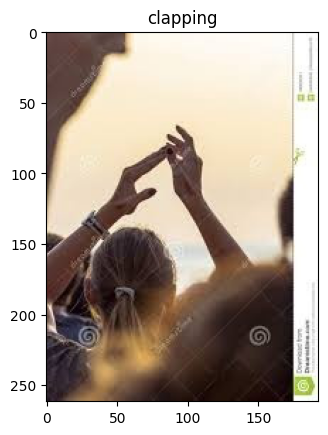

In [ ]:
look()

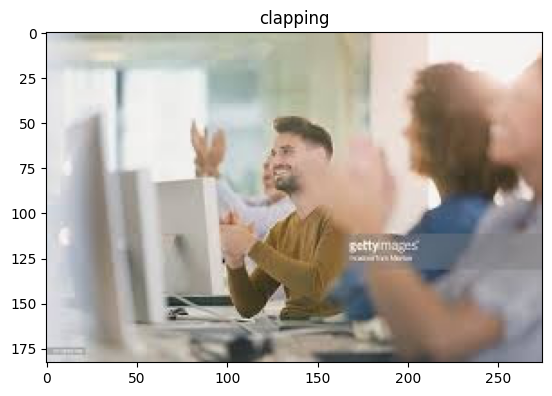

In [ ]:
look()

### Data on Process

In [ ]:
img_data = []
for i in (range(len(train_folder))):
    t = 'drive/MyDrive/Belajar_HAR/Human_Action_Recognition/train/' + train_csv['filename'][i]
    tmp_img = Image.open(t)
    img_data.append(np.asarray(tmp_img.resize((160,160))))

In [ ]:
x_train = np.asarray(img_data)
type(x_train)

numpy.ndarray

In [ ]:
y_train = to_categorical(np.asarray(train_csv['label'].factorize()[0]))
y_train[:10]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

### Training & Validation Split (for future research, not yet implemented)

In [ ]:
TRAINING_SPLIT = 0.85

def train_val_split(images, labels, training_split):
    # Compute the number of images that will be used for training
    train_size = int(len(labels)*training_split)

    # Split the images and labels into train/validation splits
    train_img = images[:train_size]
    train_labels = labels[:train_size]

    validation_img = images[train_size:]
    validation_labels = labels[train_size:]

    return train_img, validation_img, train_labels, validation_labels

In [ ]:
train_images, val_images, train_labels, val_labels = train_val_split(x_train, y_train, TRAINING_SPLIT)

print(f"There are {len(train_images)} images for training.\n")
print(f"There are {len(train_labels)} labels for training.\n")
print(f"There are {len(val_images)} images for validation.\n")
print(f"There are {len(val_labels)} labels for validation.")

### Build Model (VGG16 Pre-trained Model)

In [ ]:
model = Sequential()
vgg_pretrained= tf.keras.applications.VGG16(include_top=False,
                                            input_shape=(160,160,3),
                                            pooling='avg',
                                            classes=15,
                                            weights='imagenet')
for layer in vgg_pretrained.layers:
        layer.trainable=False

model.add(vgg_pretrained)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(15, activation='softmax'))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 14,985,039
Trainable params: 270,351
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=15
    )

Epoch 1/15
394/394 [==============================] - 39s 69ms/step - loss: 2.2499 - accuracy: 0.4438
Epoch 2/15
394/394 [==============================] - 26s 65ms/step - loss: 1.2206 - accuracy: 0.6033
Epoch 3/15
394/394 [==============================] - 26s 66ms/step - loss: 0.9536 - accuracy: 0.6847
Epoch 4/15
394/394 [==============================] - 27s 68ms/step - loss: 0.7365 - accuracy: 0.7556
Epoch 5/15
394/394 [==============================] - 27s 68ms/step - loss: 0.5447 - accuracy: 0.8226
Epoch 6/15
394/394 [==============================] - 27s 67ms/step - loss: 0.3921 - accuracy: 0.8707
Epoch 7/15
394/394 [==============================] - 26s 67ms/step - loss: 0.2785 - accuracy: 0.9113
Epoch 8/15
394/394 [==============================] - 27s 68ms/step - loss: 0.1959 - accuracy: 0.9398
Epoch 9/15
394/394 [==============================] - 27s 68ms/step - loss: 0.1805 - accuracy: 0.9425
Epoch 10/15
394/394 [==============================] - 27s 67ms/step - loss: 0.162

In [ ]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    # plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric]) # , f'val_{metric}'
    plt.show()

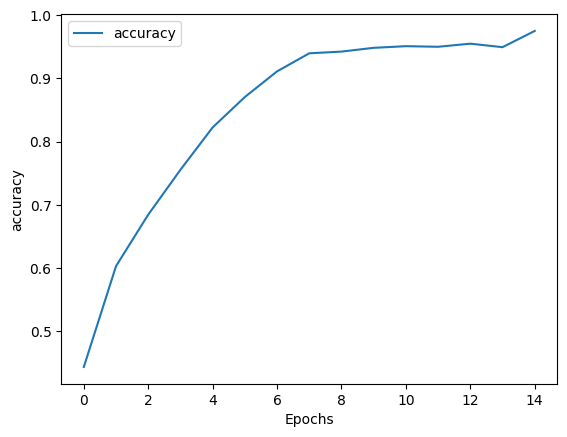

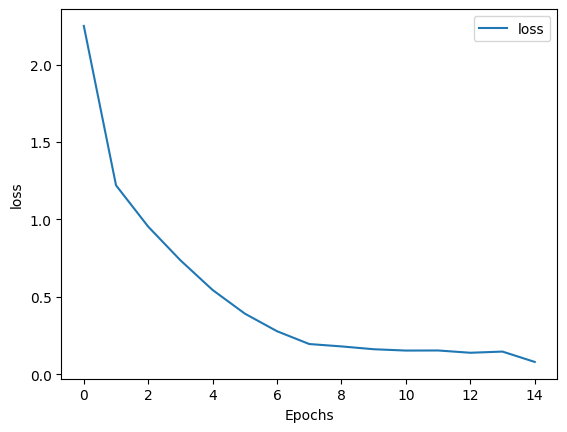

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
category = train_csv['label'].unique()
category

array(['sitting', 'using_laptop', 'hugging', 'sleeping', 'drinking',
       'clapping', 'dancing', 'cycling', 'calling', 'laughing', 'eating',
       'fighting', 'listening_to_music', 'running', 'texting'],
      dtype=object)

In [ ]:
def read_img(test_img):
    image = Image.open(test_img)
    return np.asarray(image.resize((160,160)))

def test_predict(test_img):
    result = model.predict(np.asarray([read_img(test_img)]))

    i = np.where(result==np.max(result))
    prediction = category[i[1][0]]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)

    image = img.imread(test_img)
    plt.imshow(image)
    plt.title(prediction)

1/1 [==============================] - 1s 754ms/step
probability: 99.42447543144226%
Predicted class :  eating


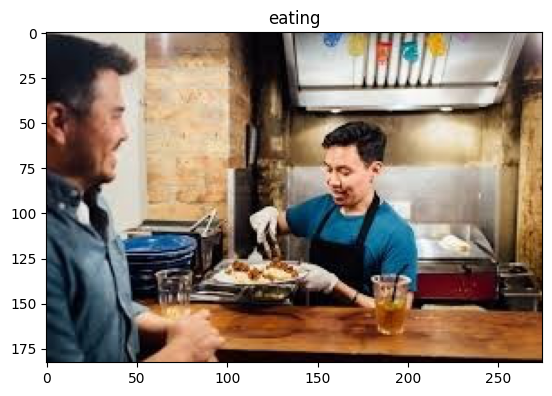

In [ ]:
test_predict('drive/MyDrive/Belajar_HAR/Human_Action_Recognition/test/Image_2.jpg')

1/1 [==============================] - 0s 25ms/step
probability: 100.0%
Predicted class :  fighting


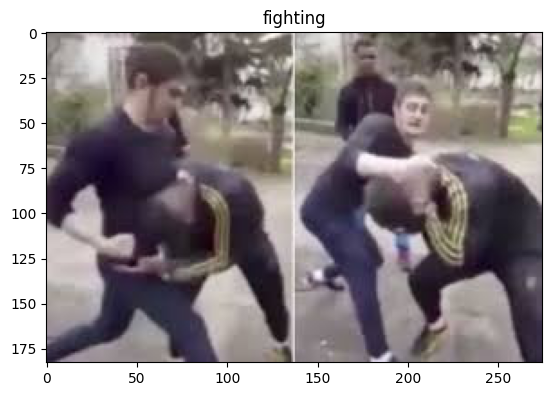

In [ ]:
test_predict('drive/MyDrive/Belajar_HAR/Human_Action_Recognition/test/Image_40.jpg')

1/1 [==============================] - 0s 23ms/step
probability: 96.07563614845276%
Predicted class :  listening_to_music


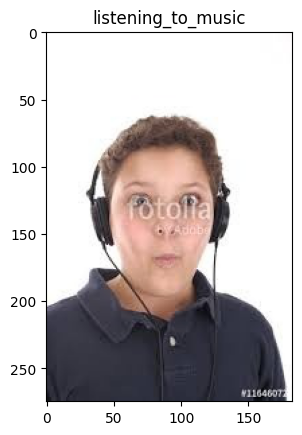

In [ ]:
test_predict('drive/MyDrive/Belajar_HAR/Human_Action_Recognition/test/Image_11.jpg')

1/1 [==============================] - 0s 24ms/step
probability: 99.99991655349731%
Predicted class :  running


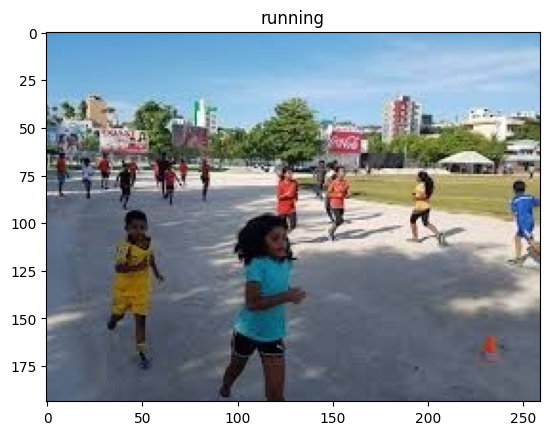

In [ ]:
test_predict('drive/MyDrive/Belajar_HAR/Human_Action_Recognition/test/Image_78.jpg')

1/1 [==============================] - 0s 23ms/step
probability: 100.0%
Predicted class :  cycling


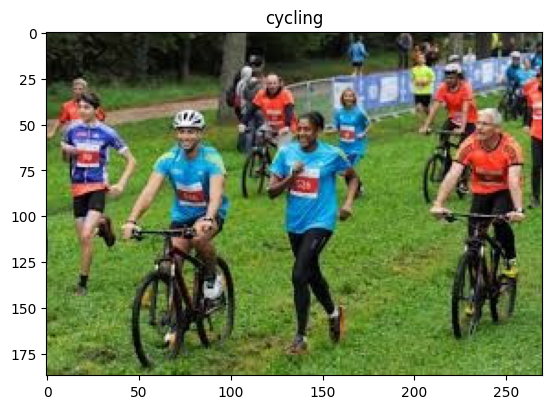

In [ ]:
test_predict('drive/MyDrive/Belajar_HAR/Human_Action_Recognition/test/Image_1093.jpg')

1/1 [==============================] - 0s 22ms/step
probability: 77.80207395553589%
Predicted class :  texting


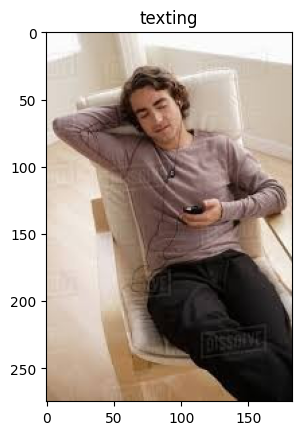

In [ ]:
test_predict('drive/MyDrive/Belajar_HAR/Human_Action_Recognition/test/Image_1454.jpg')